 <a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 300, align = "center"></a>



## <center> Classification with Python:Project  
 <center><a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a>, Ph.D. (Data Scientist, IBM)


 In this project, you will build a classifier to determine if someone will pay off their lone or go into collection

### Let's load required libraries

In [1]:
import itertools

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing


import pandas as pd
import numpy as np
%matplotlib inline
print("works")

works


### About dataset

> **Loan_status**: Whether a loan is paid off on in collection  
> **Principal**: Basic principal loan amount at the origination  
> **terms**: Can be weekly (7 days), biweekly, and monthly payoff schedule  
> **Effective_date**: When the loan got originated and took effects  
> **Due_date**: Since it’s one-time payoff schedule, each loan has one single due date  
> **age**:age  
> **education**: education  
> **gender**: gender of borrower, male or female

### Load data from CSV file  

In [2]:
name='https://ibm.box.com/shared/static/lm0t732a7sub5thz96tpexizrbkiub6w.csv'
df = pd.read_csv(name)
df.head()

,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female


### Convert to date time object 

In [3]:
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female


# Data Visualization and Anylisis 



#### Let’s see how many of each class is in our data set 

In [4]:
df['loan_status'].value_counts()

PAIDOFF       300
COLLECTION    100
Name: loan_status, dtype: int64

#### 300 people have paid off the loan on time and 100 have gone into collection 


## Some Functions for Plotting 

In [5]:
def NiceHist(Name,df,H=False):
    #plt.hist([df.ix[df['loan_status']=='PAIDOFF',Name],df.ix[df['loan_status']=='COLLECTION',Name]],stacked=True,alpha=0.5,label=['PAIDOFF', 'COLLECTION']) 
    Paid=df.ix[df['loan_status']=='PAIDOFF',Name].values
    notPaid=df.ix[df['loan_status']=='COLLECTION',Name].values
    Max=np.array([Paid.max(),notPaid.max()]).max()
    Min=np.array([Paid.min(),notPaid.min()]).min()
    bins = np.linspace(Min, Max,10)
   
    

    plt.hist(Paid, bins, alpha=0.5, label='PAIDOFF',color='g')
    plt.hist(notPaid, bins, alpha=0.5, label='COLLECTION',color='r')
    plt.legend(loc='upper left')
    plt.xlabel(Name)
    plt.title('Histogram of '+Name+ ' for Different Classes' )
    plt.ylabel('Number of people')
    plt.show()
        

        
def CoolPlot(df,Name_x,Name_y):       # no labels
    nullfmt = NullFormatter()   
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]

   # nullfmt = NullFormatter()         # no labels

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(1, figsize=(8, 8))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # the scatter plot:
    whatcolor=df['loan_status'].apply(lambda x: 'g' if x=='PAIDOFF' else 'r' )

    axScatter.scatter(df[Name_x], df[Name_y],c=whatcolor,marker=(5, 0)) 
    axScatter.set_xlabel(Name_x)
    axScatter.set_ylabel(Name_y)
    
    Paid_x=df.ix[df['loan_status']=='PAIDOFF',Name_x].values
    notPaid_x=df.ix[df['loan_status']=='COLLECTION',Name_x].values
    Max_x=np.array([Paid_x.max(),notPaid_x.max()]).max()
    Min_x=np.array([Paid_x.min(),notPaid_x.min()]).min()
    bins_x = np.linspace(Min_x, Max_x,10)

    axHistx.hist(Paid_x, bins_x, alpha=0.5, label='PAIDOFF',color='g')
    axHistx.hist(notPaid_x, bins_x, alpha=0.5, label='COLLECTION',color='r')
    axHistx.legend(loc='upper left')


    Paid_y=df.ix[df['loan_status']=='PAIDOFF',Name_y].values
    notPaid_y=df.ix[df['loan_status']=='COLLECTION',Name_y].values
    Max_y=np.array([Paid_y.max(),notPaid_y.max()]).max()
    Min_y=np.array([Paid_y.min(),notPaid_y.min()]).min()
    bins_y = np.linspace(Min_y, Max_y,10)
    axHisty.hist(Paid_y, bins_y, alpha=0.5, label='PAIDOFF',color='g', orientation='horizontal')
    axHisty.hist(notPaid_y, bins_y, alpha=0.5, label='COLLECTION',color='r', orientation='horizontal')

    


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3*cm.max()/4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')





/Users/bulent/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


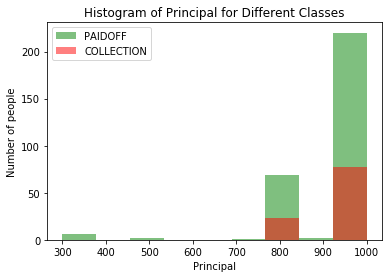

In [6]:
NiceHist('Principal',df)

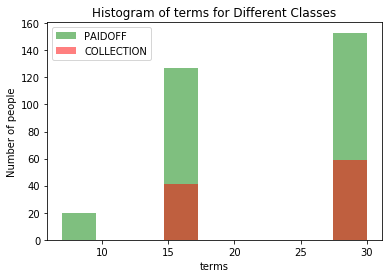

In [7]:
NiceHist('terms',df)

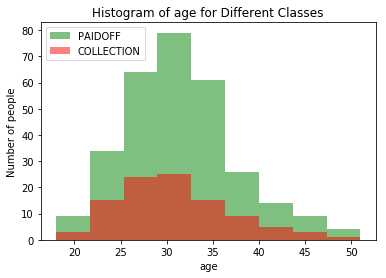

In [8]:
NiceHist('age',df)

## Let’s examine the variables in two dimensions   

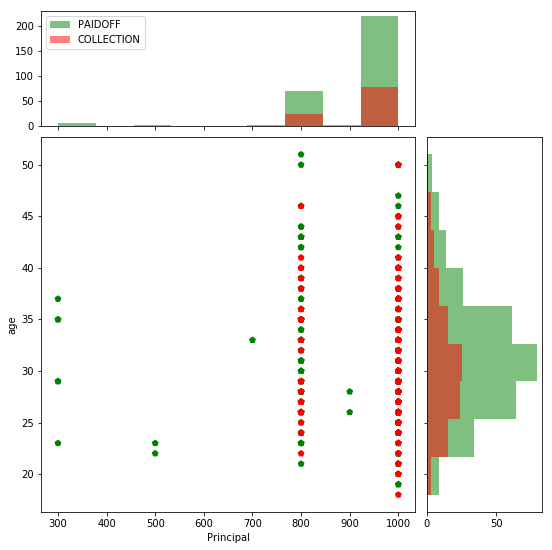

In [9]:
CoolPlot(df,'Principal','age')

# Pre-processing: Feature Selection/Extraction

### Let's look at the day of the week people get the loan 

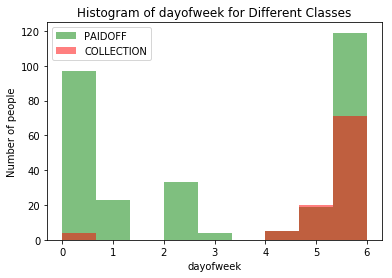

In [10]:
df['dayofweek']=df['effective_date'].dt.dayofweek
NiceHist('dayofweek',df)

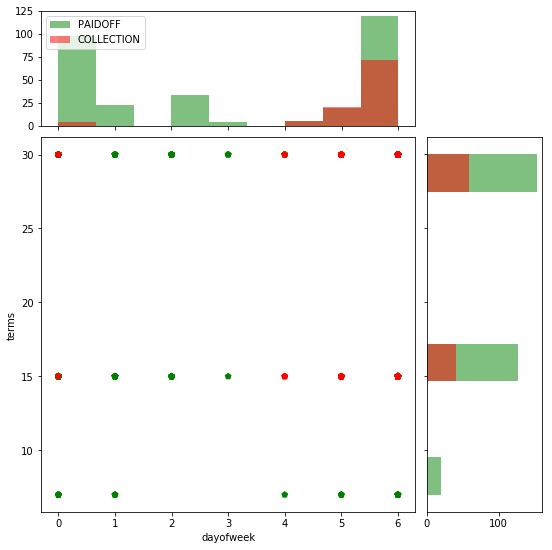

In [11]:
CoolPlot(df,'dayofweek','terms')

### We see that people who get the loan at the end of the week dont pay it off, so lets use feature binarization to set a threshold values less then day 4 

In [12]:
df['weekend']=df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1


### Let's look at gender:

In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)


Gender  loan_status
female  PAIDOFF        0.841270
        COLLECTION     0.158730
male    PAIDOFF        0.732938
        COLLECTION     0.267062
Name: loan_status, dtype: float64

#### 84 % of female pay there loans while ony 73 % of males  pay there loan

### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.788462
                      COLLECTION     0.211538
High School or Below  PAIDOFF        0.715116
                      COLLECTION     0.284884
Master or Above       PAIDOFF        0.750000
                      COLLECTION     0.250000
college               PAIDOFF        0.773256
                      COLLECTION     0.226744
Name: loan_status, dtype: float64

#### 79% of people with a Bachelor degree pay of their loan compared to 71 % with a high school diploma or less  


### Convert Categorical Features Using Feature Transformation and One Hot Encoding  


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question   </h1>

<b>Convert male to a zeros and  female to a one ? </b>
</div>

In [15]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1


 <div align="right">
<a href="#1" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="1" class="collapse">
```
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()
```
</div>

#### Feature befor One Hot Encoding

In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,50,1,Bechalor
2,1000,30,33,1,Bechalor
3,1000,15,27,0,college
4,1000,30,28,1,college


#### We use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

In [17]:
Feature=df[['Principal','terms','age','Gender','weekend']]
Feature=pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,50,1,0,1,0,0
2,1000,30,33,1,0,1,0,0
3,1000,15,27,0,0,0,0,1
4,1000,30,28,1,1,0,0,1


Lets defind feature sets, X:

In [18]:
X=Feature
X[0:5]


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,50,1,0,1,0,0
2,1000,30,33,1,0,1,0,0
3,1000,15,27,0,0,0,0,1
4,1000,30,28,1,1,0,0,1


What are our lables?

In [19]:
y=df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

#### Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [70]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.50130175,  0.92089421,  2.31334964, -0.43236977, -1.21838912,
        -0.38655567,  1.15133896, -0.86855395],
       [ 0.50130175,  0.92089421,  3.14310202,  2.31283513, -1.21838912,
         2.5869495 , -0.86855395, -0.86855395],
       [ 0.50130175,  0.92089421,  0.32194392,  2.31283513, -1.21838912,
         2.5869495 , -0.86855395, -0.86855395],
       [ 0.50130175, -0.9332552 , -0.67375893, -0.43236977, -1.21838912,
        -0.38655567, -0.86855395,  1.15133896],
       [ 0.50130175,  0.92089421, -0.50780846,  2.31283513,  0.82075585,
        -0.38655567, -0.86855395,  1.15133896]])

### Train Test Split  

In [21]:
from sklearn.model_selection import train_test_split


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question   </h1>

<b>Use the function  **train_test_split** to split **X** and **y** into **X_train**, **X_test**, **y_train**, **y_test**.  Use the parameter  **test_size** to use 20% of your data as test data. Set **random_state=4** </b>
</div>

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1, random_state=4)

print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (360, 8) (360,)
Test set: (40, 8) (40,)


 <div align="right">
<a href="#3" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="3" class="collapse">
```
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=4)
```
</div>

# Classification 

## K nearest neighbor (K-NN)

#### Import library 

Classifier implementing the k-nearest neighbors vote.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

### Training

In [24]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)

### Predicting

In [25]:
yhat=neigh.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### Accuracy evaluation

In [26]:
np.mean(yhat==y_test)

0.675

#### What about other K?

In [27]:
Ks=7
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    ConfustionMx.append(confusion_matrix(y_test,yhat,labels=['PAIDOFF','COLLECTION' ]))
mean_acc

array([0.7  , 0.55 , 0.675, 0.675, 0.725, 0.725])

#### Plot  model accuracy  for Different number of Neighbors 

Text(0.5,0,'Number of Nabors (K)')

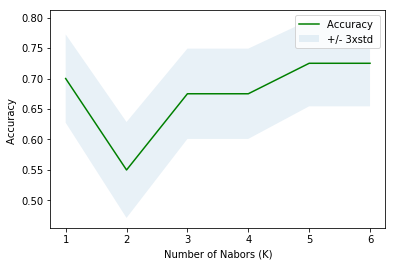

In [28]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')


In [29]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.725 with k= 5


Normalized confusion matrix
[[0.78125 0.21875]
 [0.5     0.5    ]]


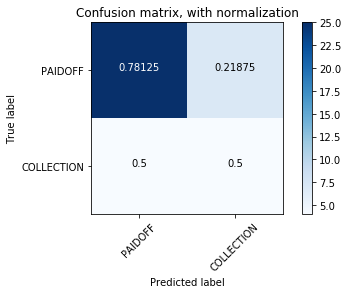

In [30]:
plot_confusion_matrix(ConfustionMx[mean_acc.argmax()], classes=['PAIDOFF','COLLECTION' ],title='Confusion matrix, with normalization',normalize=True)

### Grid Search

 We use **GridSearchCV** to help automate the process of finding k we can use the parameter **n_jobs=-1**  to use all the cores. First we import the function **GridSearchCV** from the module **model_selection** .

In [31]:
from sklearn.model_selection import GridSearchCV

 Let's create a dictionary of hyperparameter for k:

In [32]:
param_grid={'n_neighbors':[x for x in range(1,7)]}
param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6]}


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question   </h1>

<b>Create a grid search object; the first input is the object constructor of the model in this case KNeighborsClassifier(). Set the parameter cv to three. The parameter **param_grid** is the parameter grid we defined above. Use the default scoring method: </b>
</div>


In [33]:
grid=GridSearchCV(KNeighborsClassifier(),cv=3,param_grid=param_grid,n_jobs=-1)
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

 <div align="right">
<a href="#4" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="4" class="collapse">
```
grid = GridSearchCV(KNeighborsClassifier(), cv=3, param_grid=param_grid,n_jobs=-1)
```
</div>

We fit the object

In [34]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

 the best  value for k is

In [35]:
grid.best_params_

{'n_neighbors': 3}

What is the best score:

In [36]:
grid.best_score_

0.7083333333333334

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question   </h1>

<b>Obtain the model with the best parameters and assign it to the variable KNN,then obtain a prediction using the test data and find the accuracy</b>
</div>



In [37]:
KNN=grid.best_estimator_ 
yhat=KNN.predict(X_test) 
np.mean(yhat==y_test)

0.675


 <div align="right">
<a href="#5" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="5" class="collapse">
```
KNN=grid.best_estimator_
yhat=KNN.predict(X_test)
np.mean(yhat==y_test)
```
</div>

# Logistic regression

 Let's import **LogisticRegression**  from the module **linear_model** .

In [38]:
from sklearn.linear_model import LogisticRegression

Lets build our model:

In [39]:
LR = LogisticRegression(C=0.01)
LR.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now we can predict using our test set:

In [40]:
yhat= LR.predict(X_test)
acc=np.mean(yhat==y_test)
acc

0.8

There is a parameter, regulization, that is used for preventing over fitting. We can find the best regulization value using accuracy:

### Determine Model Parameters and Model Accuracy

In [41]:
Regularization_Inv=[0.00001,0.1,1,100]
Length=len(Regularization_Inv)
mean_acc=np.zeros((Length))
std_acc=np.zeros((Length))
ConfustionMx=[];


for Reg,n in zip(Regularization_Inv,range(0,Length)):
    
    LR = LogisticRegression(C=Reg).fit(X_train,y_train)
    yhat=LR.predict(X_test)
    mean_acc[n]=np.mean(yhat==y_test);
    
    
    std_acc[n]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    ConfustionMx.append(confusion_matrix(yhat,y_test,labels=['PAIDOFF','COLLECTION' ]))
mean_acc 

array([0.825, 0.825, 0.825, 0.825])

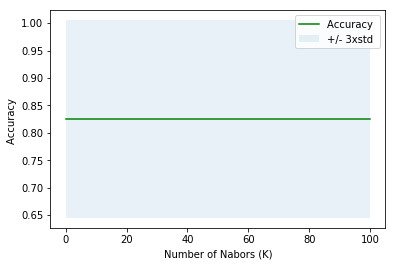

In [42]:
plt.plot(Regularization_Inv,mean_acc,'g')
plt.fill_between(Regularization_Inv,mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')

plt.show()

In [43]:
print( "The best accuracy was for Logistic regression", mean_acc.max()) 

The best accuracy was for Logistic regression 0.825


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question   </h1>

<b>Create a dictionary **param_grid** hyperparameters and their values. The term C will be the parameter that controls the inverse of the regularisation strength. </b>
</div>






In [44]:
param_grid={'C':[0.001,0.01,0.1]}

 <div align="right">
<a href="#7" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="7" class="collapse">
```
param_grid={'C':[0.001,0.01,0.1]}
```
</div>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question   </h1>

<b>create a  **GridSearchCV** object **grid**  for linear regression using the above parameter grid, then fit the object using the training data.  </b>
</div>



In [45]:
grid=GridSearchCV(LogisticRegression(),cv=2,param_grid=param_grid,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=2, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

 <div align="right">
<a href="#8" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="8" class="collapse">
```
grid = GridSearchCV(LogisticRegression(), cv=2, param_grid=param_grid,n_jobs=-1)
grid.fit(X_train,y_train)
```
</div>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question   </h1>

<b>Find the accuracy of your model using the test data with the following code:.  </b>
</div>



In [46]:
LR=grid.best_estimator_
yhat=LR.predict(X_test)
np.mean(yhat==y_test)

0.825

<div align="right">
<a href="#9" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="9" class="collapse">
```
LR=grid.best_estimator_
yhat=LR.predict(X_test)
np.mean(yhat==y_test)
```
</div>

## Support vector Machines

### Import Support Vector Machines Library

In [54]:
from sklearn import svm 
import itertools

In [55]:
Gama=[0.001,0.1,1,10]
Con=[0.01,0.1,1,10]
mean_acc=np.zeros((len(Gama)*len(Con)))
n=0

### Train

In [56]:
SVMobject= svm.SVC(gamma=0.1,C=1)
SVMobject.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Predict

In [57]:
yhat=SVMobject.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### Evaluation

In [58]:
acc=np.mean(yhat==y_test)
acc

0.85

Lets find the best parameters for SVM

In [59]:
print( "The best accuracy was", mean_acc.max()) 

The best accuracy was 0.0


### Display Confutation Matrix With Best Accuracy 

Normalized confusion matrix
[[0.83783784 0.16216216]
 [0.33333333 0.66666667]]


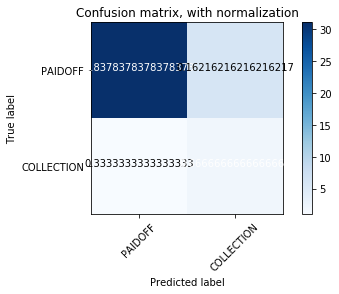

In [60]:

plot_confusion_matrix(ConfustionMx[mean_acc.argmax()], classes=['PAIDOFF','COLLECTION' ],title='Confusion matrix, with normalization',normalize=True)
plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question   </h1>

<b>Create a Parameter grid for a Support Vector Machine, the kernel being the default RBF. The   Penalty parameter **C**   should range from  0.001, 0.01 and  0.1.  The parameter **gamma** should be in the ranges from 0.01,0.1,1 and 10.  </b>
</div> 


In [61]:
param_grid={'C':[0.001,0.01,0.1],'gamma':[0.01,0.1,1,10]}

 <div align="right">
<a href="#10" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="10" class="collapse">
```
param_grid={'C':[0.001,0.01,0.1],'gamma':[0.01,0.1,1,10]}
```
</div>

Find the accuracy of your model using the test data with the following code:

In [62]:
grid = GridSearchCV(svm.SVC(), cv=2, param_grid=param_grid,n_jobs=-1)
grid.fit(X_train,y_train)
LR=grid.best_estimator_
yhat=LR.predict(X_test)
np.mean(yhat==y_test)

0.8

### Decision Trees

 Let's import the DecisionTreeClassifier from the module tree.

In [63]:
from sklearn.tree import DecisionTreeClassifier

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question   </h1>

<b>Create a decision tree model  using the default parameters of the model and fit the model and find the accuracy of your model using the test data : </b>
</div> 

In [64]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<div align="right">
<a href="#11" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="11" class="collapse">
```
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.fit(X_train, y_train)
yhat=dt.predict(X_test)
np.mean(yhat==y_test)
```
</div>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question   </h1>

<b>Create a Hyperparameter grid; the grid contains different values for the minimum number of splits ranging from 2 ,4,8 10 as well as various tree depths 5,10,20 </b>
</div> 


In [65]:
param_grid={'min_samples_split':[2,4,8,10],'max_depth':[5,10,20]}

 <div align="right">
<a href="#12" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="12" class="collapse">
```
param_grid={'min_samples_split':[2,4,8,10],'max_depth':[5,10,20]}
```
</div>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question   </h1>

<b>Use the GridSearchCV function to find the best model, then calculate  the accuracy on the test data 0 </b>
</div> 



In [69]:
grid=GridSearchCV(DecisionTreeClassifier(),cv=3, param_grid=param_grid)
grid.fit(X_train, y_train)
clf=grid.best_estimator_ 
yhat=clf.predict(X_test)
np.mean(yhat==y_test)

0.7

 <div align="right">
<a href="#13" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="13" class="collapse">
```
grid = GridSearchCV(DecisionTreeClassifier(), cv=3, param_grid=param_grid)
grid.fit(X_train,y_train)
clf=grid.best_estimator_
yhat=clf.predict(X_test)
np.mean(yhat==y_test)
```
</div>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question   </h1>

<b>Take Home: Determine the best Hyperparameters for a Random forest, evaluate your result on the test data. </b>
</div> 


#### About the Authors:  

 [Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.